In [1]:
# AI DSS for Crop Yield Prediction using ML
# Step 2: Model Prototype for Yield Forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("//kaggle/input/crop-yield-prediction-dataset/yield_df.csv") 

In [3]:
# Preprocessing
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Select one crop for focused prototype, e.g., 'Maize'
maize_df = df[df['Item'] == 'Maize']

# Feature & target selection
X = maize_df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = maize_df['hg/ha_yield']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict
y_pred = model.predict(X_test)

In [8]:
# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.33
RMSE: 22170.03


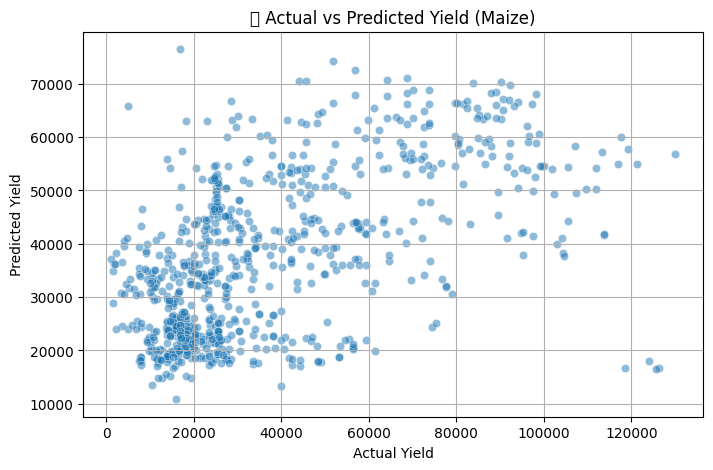

In [9]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('📉 Actual vs Predicted Yield (Maize)')
plt.grid(True)
plt.show()

In [10]:
#Step 4: Financial Modelling (with ML Forecast)

# Simulated revenue model based on subscriber growth
years = np.array([1, 2, 3, 4, 5])
subscribers = np.array([5000, 15000, 40000, 100000, 200000])
revenue = subscribers * 99  # ₹99 per month per subscriber

# Train forecast model
from sklearn.linear_model import LinearRegression

model_rev = LinearRegression()
model_rev.fit(years.reshape(-1, 1), revenue)

LinearRegression()

In [11]:
# Predict revenue for next 2 years
future_years = np.array([6, 7]).reshape(-1, 1)
forecast_revenue = model_rev.predict(future_years)

In [12]:
# Show predictions
for year, rev in zip(future_years.flatten(), forecast_revenue):
    print(f"Year {year}: ₹{rev:.0f}")

Year 6: ₹21235500
Year 7: ₹25938000


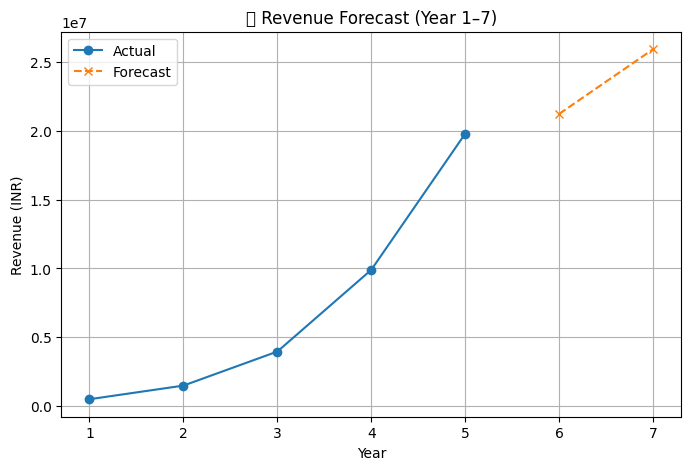

In [13]:

# Plot
plt.figure(figsize=(8, 5))
plt.plot(years, revenue, marker='o', label='Actual')
plt.plot(future_years, forecast_revenue, marker='x', linestyle='--', label='Forecast')
plt.title('💰 Revenue Forecast (Year 1–7)')
plt.xlabel('Year')
plt.ylabel('Revenue (INR)')
plt.legend()
plt.grid(True)
plt.show()
